## Linear Regression

Regression analysis predicts the relationship between a dependent variable (target or label) and one or more independent variables (features). It’s widely used for predicting a continuous quantity, such as stock prices, house prices, or temperatures, based on various features. Linear Regression is a subclass of regression problems where the relationship between the target (label) and features is linear, i.e., the label is a linear function of the features. Figure 1 illustrates a simple dataset where x-axis is the feature and the y-axis is the label. The goal of linear regression is to find a straight line (amongst multiple possible straight lines) that best fits the dataset.

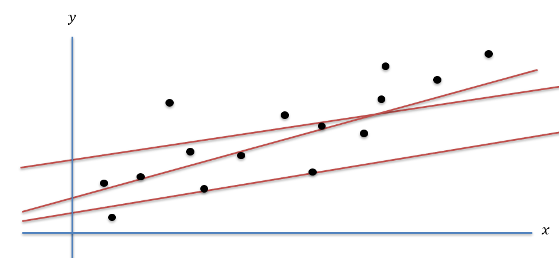

### Applications of Regression
Linear regression models find extensive applications across various fields where the relationship between a dependent variable and one or more independent variables needs to be modeled. Here are some elaborated examples:

- **Stock Price Prediction**: Financial analysts use linear regression to predict future stock prices by considering a range of features such as historical stock prices, trading volume, economic indicators (e.g., interest rates, inflation rates), and market sentiment indicators. For instance, the model might predict the stock price of a company based on its earnings per share (EPS) and the price-to-earnings (P/E) ratio over the past quarters, allowing investors to make informed decisions.

- **House Price Prediction**: Real estate companies and investors use linear regression to estimate the market value of properties. Features might include the property's square footage, the number of bedrooms and bathrooms, the age of the house, proximity to schools and amenities, and neighborhood crime rates. By analyzing these factors, the model can help in setting competitive house prices and identifying undervalued properties.

- **Healthcare**: In medical research, linear regression models are used to understand the relationship between various risk factors and health outcomes. For example, a study might explore how different lifestyle factors (such as diet, physical activity, and smoking) influence blood pressure levels or the risk of developing certain diseases, aiding in the development of targeted health interventions.

- **Sales Forecasting**: Businesses often use linear regression to forecast sales based on factors such as advertising spend across different media channels, seasonal trends, and economic conditions. For example, a retail company might predict monthly sales using variables like advertising budget, the number of new store openings, and the unemployment rate, enabling more effective budgeting and strategic planning.

- **Energy Consumption Analysis**: Utility companies can apply linear regression to predict energy consumption patterns of households or industries based on historical consumption data, weather conditions, and pricing policies. Such models are crucial for optimizing energy production, determining pricing strategies, and planning for future energy demands.

These applications demonstrate the versatility of linear regression in extracting meaningful insights from data, aiding decision-making processes across different domains.




### Empirical Risk $R_ n$

$$
R_ n(\theta ) = \frac{1}{n} \sum _{t=1}^{n} \text {Loss}(y^{(t)} - \theta \cdot x^{(t)})
$$

### Compute Hinge Loss
$$
\text {Loss}_ h(z) = \begin{cases}  0 & \text {if } z \geq 1 \\ 1 -z, & \text { otherwise} \end{cases}.
$$


### Compute Squared Error Loss

$$
\displaystyle \text {Loss}(z) = \frac{z^2}{2}.
$$

Below program computes Empirical Risk using Hinge Loss and Squared Error Loss for given x, y and theta values

In [3]:
import numpy as np


def hingeLoss(z):
    return 0 if z >= 1 else 1 - z

def squaredLoss(z):
    return (z ** 2)/2

def empiricalRisk():
    x = [[1,0,1], [1,1,1], [1,1,-1], [-1,1,1]]
    y = [2, 2.7, -0.7, 2]
    theta = [0, 1, 2]

    def calculateDistance(x, y):
        return y - np.dot(theta, x)

    R_squaredLoss = 1/len(x) * sum(
        [squaredLoss(calculateDistance(x[i], y[i])) for i in range(len(x))]
    )
    R_hingeLoss = 1/len(x) * sum(
        [hingeLoss(calculateDistance(x[i], y[i])) for i in range(len(x))]
    )

    print(f"Empirical Risk for squared loss: {R_squaredLoss}")
    print(f"Empirical Risk for hinge loss: {R_hingeLoss}")

empiricalRisk()

Empirical Risk for squared loss: 0.1475
Empirical Risk for hinge loss: 1.25


## Ridge Regression

The given loss function $J_{n, \lambda}(\theta, \theta_0)$ represents a regularized linear regression model, specifically Ridge Regression (also known as Tikhonov regularization). It is designed to minimize the discrepancy between the observed outcomes $y^{(t)}$ and the outcomes predicted by a linear model, while also penalizing the magnitude of the coefficients to prevent overfitting. The function is defined as:

$$
J_{n, \lambda}(\theta, \theta_0) = \frac{1}{n} \sum_{t=1}^{n} \frac{(y^{(t)} - \theta \cdot x^{(t)} - \theta_0)^2}{2} + \frac{\lambda}{2} \|\theta\|^2
$$

Here's a breakdown of its components:

- $\frac{1}{n} \sum_{t=1}^{n} \frac{(y^{(t)} - \theta \cdot x^{(t)} - \theta_0)^2}{2}$: This part represents the average of the squared residuals (errors) between the actual outcomes $y^{(t)}$ and the outcomes predicted by the linear model $\theta \cdot x^{(t)} + \theta_0$, where $\theta$ is the vector of coefficients, $x^{(t)}$ is the vector of features for the $t$-th observation, and $\theta_0$ is the intercept term. The division by 2 is often included for mathematical convenience, especially when taking derivatives.

- $\frac{\lambda}{2} \|\theta\|^2$: This part is the regularization term. $\lambda$ is the regularization parameter that controls the strength of the regularization. The regularization term penalizes large values of the coefficients in $\theta$ by adding the squared magnitude of $\theta$ ($\|\theta\|^2$, which is the sum of the squares of the coefficients) to the loss function. This helps to prevent overfitting by discouraging overly complex models that have large coefficients. The choice of $\lambda$ is critical: a too large $\lambda$ can lead to underfitting, while a too small $\lambda$ might not effectively prevent overfitting.

- $n$: Represents the number of observations in the dataset.

- $\lambda$: The regularization parameter that balances the trade-off between fitting the training data well and keeping the model coefficients small to avoid overfitting.

The goal in Ridge Regression is to find the values of $\theta$ and $\theta_0$ that minimize $J_{n, \lambda}(\theta, \theta_0)$, thus achieving a balance between a good fit to the data and maintaining a model that generalizes well to unseen data by keeping the model complexity (as measured by the size of the coefficients) in check.